In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from scipy import stats

In [2]:
df_pre = pd.read_csv('./PL_Payroll_Income.csv', header=0)

In [59]:

df = df_pre.dropna(axis=0)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10876 entries, 18 to 12790
Data columns (total 18 columns):
LocationNo                   10876 non-null float64
BusinessMonth                10876 non-null object
rollavg_Income               10876 non-null float64
rollavg_Payroll              10876 non-null float64
rollavg_PayrollPct           10876 non-null float64
change_Income                10876 non-null float64
change_Payroll               10876 non-null float64
change_PayrollPct            10876 non-null float64
change_BuyTransactions       10876 non-null float64
change_BuyItems              10876 non-null float64
change3mo_Payroll            10876 non-null float64
change3mo_PayrollPct         10876 non-null float64
change6mo_Payroll            10876 non-null float64
change6mo_PayrollPct         10876 non-null float64
change3mo_BuyTransactions    10876 non-null float64
change3mo_BuyItems           10876 non-null float64
change6mo_BuyTransactions    10876 non-null float64
change6

In [61]:
filt_err = (abs(df['change_Payroll']) < 0.25) & (abs(df['change_Income']) < 0.25) 
df = df[filt_err]
#df = df[df['BusinessMonth'] == '5/1/2019']

In [110]:
stats.pearsonr(df['change3mo_Payroll'], df['change_Income'])

(0.44040340649254206, 0.0)

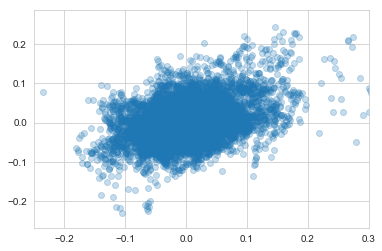

In [108]:
plt.scatter(df['change6mo_Payroll'], df['change_Income'], alpha= 0.25)
plt.xlim(-0.25, 0.3)
plt.show()

In [64]:
filt_LowPayrollPct = df['rollavg_PayrollPct'] <= -0.015
filt_MidPayrollPct = (abs(df['rollavg_PayrollPct']) < 0.015)
filt_HighPayrollPct =  (df['rollavg_PayrollPct'] > 0.015)

In [65]:
print(filt_LowPayrollPct.sum(), filt_MidPayrollPct.sum(), filt_HighPayrollPct.sum())

2654 5378 2763


In [66]:
df['PayrollPctGroup'] = np.nan
df.loc[filt_LowPayrollPct, 'PayrollPctGroup'] = 'Low'
df.loc[filt_MidPayrollPct, 'PayrollPctGroup'] = 'Mid'
df.loc[filt_HighPayrollPct, 'PayrollPctGroup'] = 'High'

In [67]:
filt_NegGrowthPct = df['change_Income'] <= (-0.01)
filt_NoGrowthPct = (abs(df['change_Income']) < 0.01)
filt_PosGrowthPct =  (df['change_Income'] >= 0.01)

In [68]:
df['IncomeGrowthGroup'] = np.nan
df.loc[filt_NegGrowthPct , 'IncomeGrowthGroup'] = 'Neg'
df.loc[filt_NoGrowthPct , 'IncomeGrowthGroup'] = 'No'
df.loc[filt_PosGrowthPct , 'IncomeGrowthGroup'] = 'Pos'

In [69]:
sns.set_style('whitegrid')

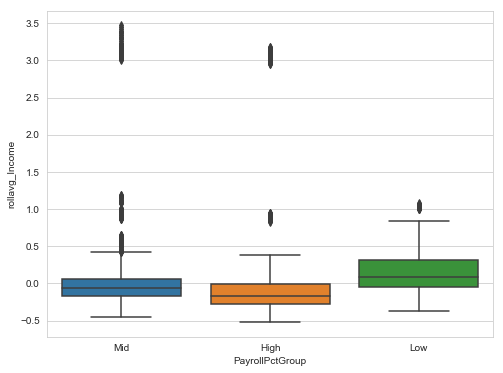

In [70]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['PayrollPctGroup'], y=df['rollavg_Income'], ax=ax)
ax
plt.show()

In [71]:
model = ols('rollavg_Income ~ C(PayrollPctGroup)', data=df).fit()

In [ ]:
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame

In [8]: print(table)

In [72]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rollavg_Income   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           5.83e-94
Time:                        16:28:53   Log-Likelihood:                -5121.2
No. Observations:               10795   AIC:                         1.025e+04
Df Residuals:                   10792   BIC:                         1.027e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [73]:
mc = MultiComparison(df['rollavg_Income'], df['PayrollPctGroup'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 High   Low    0.2178   0.193   0.2426  True 
 High   Mid    0.0793   0.0579  0.1006  True 
 Low    Mid   -0.1385  -0.1602 -0.1169  True 
---------------------------------------------
['High' 'Low' 'Mid']


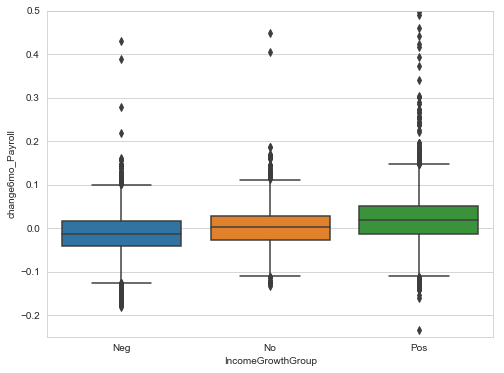

In [74]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['IncomeGrowthGroup'], y=df['change6mo_Payroll'], ax=ax)
plt.ylim(-0.25, 0.5)
plt.show()

In [75]:
model = ols('change3mo_Payroll ~ C(IncomeGrowthGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      change3mo_Payroll   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     661.6
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          8.89e-272
Time:                        16:28:54   Log-Likelihood:                 17105.
No. Observations:               10795   AIC:                        -3.420e+04
Df Residuals:                   10792   BIC:                        -3.418e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [76]:
mc = MultiComparison(df['change3mo_Payroll'], df['IncomeGrowthGroup'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
 Neg     No    0.0196  0.0165 0.0227  True 
 Neg    Pos    0.0386  0.0361 0.041   True 
  No    Pos    0.0189  0.0158 0.0221  True 
-------------------------------------------
['Neg' 'No' 'Pos']


In [99]:
filt_NegPayrollGrowth = df['change3mo_Payroll'] <= 0
filt_PosPayrollGrowth =  (df['change3mo_Payroll'] > 0)

In [100]:
df['PayrollPctChangeGroup'] = np.nan
df.loc[filt_NegPayrollGrowth, 'PayrollPctChangeGroup'] = 'Neg'
df.loc[filt_PosPayrollGrowth, 'PayrollPctChangeGroup'] = 'Pos'

df['PayrollChangeGroup'] = np.nan
df.loc[filt_NegPayrollGrowth, 'PayrollChangeGroup'] = 'Neg'
df.loc[filt_PosPayrollGrowth, 'PayrollChangeGroup'] = 'Pos'

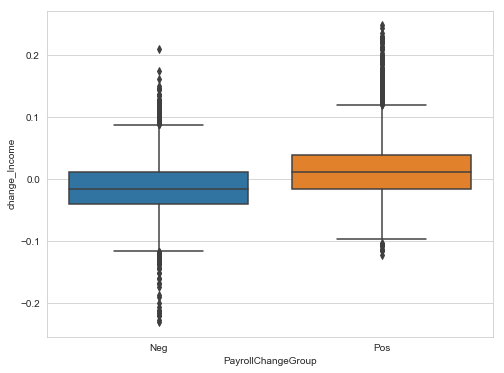

In [101]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['PayrollChangeGroup'], y=df['change_Income'], ax=ax)
plt.show()

In [102]:
model = ols('change_Income ~ C(PayrollChangeGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          change_Income   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1166.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          1.11e-242
Time:                        16:32:36   Log-Likelihood:                 18261.
No. Observations:               10795   AIC:                        -3.652e+04
Df Residuals:                   10793   BIC:                        -3.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

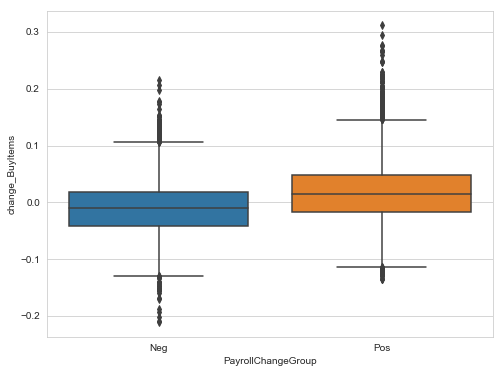

In [103]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['PayrollChangeGroup'], y=df['change_BuyItems'], ax=ax)
plt.show()

In [111]:
model = ols('change_BuyItems ~ C(PayrollChangeGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        change_BuyItems   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     839.2
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          9.20e-178
Time:                        16:34:24   Log-Likelihood:                 16842.
No. Observations:               10795   AIC:                        -3.368e+04
Df Residuals:                   10793   BIC:                        -3.366e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       